# MOVIELENS CASE STUDY

-  Perform the analysis using the Exploratory Data Analysis technique
-  Find features affecting the ratings of any particular movie
-  Build a model to predict the movie ratings

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#Import data
moviesdata = pd.read_table('movies.dat', sep="::",names=['MovieID', 'Title', 'Genres'],engine='python')
ratingsdata = pd.read_table('ratings.dat', sep="::",names=['UserID','MovieID','Rating','Timestamp'],engine='python')
usersdata = pd.read_table('users.dat', sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')

In [ ]:
usersdata.info()
moviesdata.info()
ratingsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-

In [ ]:
#Remove whitespace from each cell that contains string
moviesdata = moviesdata.apply(lambda x: x.strip() if type(x) == str else x)
ratingsdata = ratingsdata.apply(lambda x: x.strip() if type(x) == str else x)
usersdata = usersdata.apply(lambda x: x.strip() if type(x) == str else x)

In [ ]:
#Merge ratings data and users data
masterdata = pd.merge(ratingsdata, usersdata, on = 'UserID', how='left')

In [ ]:
masterdata.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [ ]:
len(masterdata['UserID'].unique())

6040

In [ ]:
#Merge movies data with master data
masterdata = pd.merge(masterdata,moviesdata, on= 'MovieID', how='left')

In [ ]:
masterdata.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [ ]:
#MovieID Title UserID Age Gender Occupation Rating.
master = masterdata.drop(['Timestamp', 'Zip-code', 'Genres'], axis=1)

In [ ]:
master.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,F,1,10,James and the Giant Peach (1996)
2,1,914,3,F,1,10,My Fair Lady (1964)
3,1,3408,4,F,1,10,Erin Brockovich (2000)
4,1,2355,5,F,1,10,"Bug's Life, A (1998)"


In [ ]:
master.drop_duplicates(inplace=True)

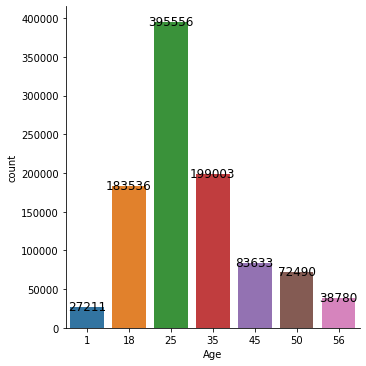

In [ ]:
#User Age distribution
plot = sns.catplot(x='Age',kind='count', data=master)
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(i,h+10, '{}'.format(h), ha = 'center', va = 'center', size=12)
plt.show()

In [ ]:
#Age group - Percentage of total
round(master['Age'].value_counts(normalize='index', sort=False),2)

1     0.03
18    0.18
25    0.40
35    0.20
45    0.08
50    0.07
56    0.04
Name: Age, dtype: float64

AGE DISTRIBUTION INSIGHTS

- Maximum users (40%) belong to the age group 25-34
- 80% of the users are within the age range of 18 to 44

### **User rating of the movie 'Toy Story'**

In [ ]:
toystory = master.loc[(master.Title == 'Toy Story (1995)')]

In [ ]:
toystory.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title
40,1,1,5,F,1,10,Toy Story (1995)
469,6,1,4,F,50,9,Toy Story (1995)
581,8,1,4,M,25,12,Toy Story (1995)
711,9,1,5,M,25,17,Toy Story (1995)
837,10,1,5,F,35,1,Toy Story (1995)


*Age-wise user rating*

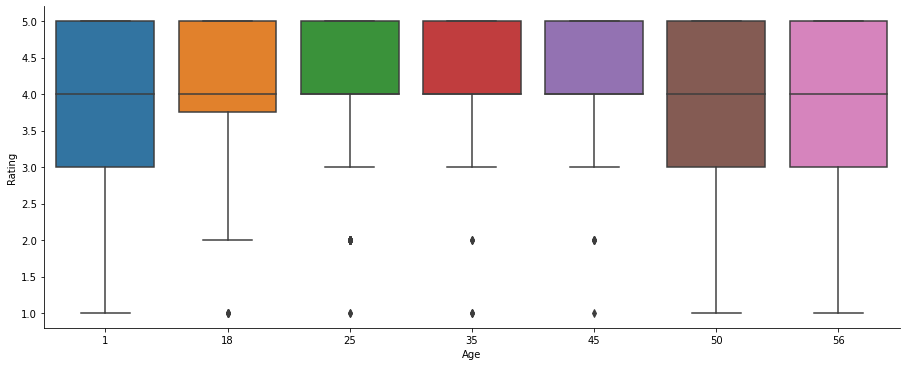

In [ ]:
sns.catplot(y='Rating', x='Age', data=toystory, kind='box', aspect=2.5)
plt.show()

*Overall user rating*

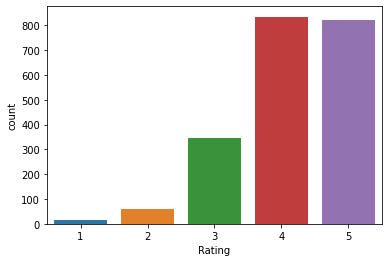

In [ ]:
sns.countplot(x='Rating', data=toystory)
plt.show()

In [ ]:
toystoryrating = toystory['Rating'].mean()
print("The average user rating of the movie Toy Story is {}".format(toystoryrating))

The average user rating of the movie Toy Story is 4.146846413095811


Insights:
- One interesting observation here is that even though the movie 'Toy Story' is actually intended for children, it is the young and middle aged adults who enjoy it more. This is evident from the ratings given by different age groups.

- Those below the age of 18 have given it a rating that ranges from 3 to 5 whereas those above 18(and below 50), have majorly rated it 4 or 5

### Top 25 movies by viewership rating

In [ ]:
top25 = master.sort_values(by='Rating', ascending=False)
top25 = top25['Title']
top25.drop_duplicates(inplace=True)
list(top25.head(25))

["One Flew Over the Cuckoo's Nest (1975)",
 'Boat, The (Das Boot) (1981)',
 'Glory (1989)',
 'Animal House (1978)',
 'E.T. the Extra-Terrestrial (1982)',
 'Truth About Cats & Dogs, The (1996)',
 'Crying Game, The (1992)',
 'Platoon (1986)',
 'Right Stuff, The (1983)',
 'Robocop (1987)',
 'Dersu Uzala (1974)',
 'Girlfight (2000)',
 'Beautiful Girls (1996)',
 'Tombstone (1993)',
 'Raging Bull (1980)',
 'Straight Story, The (1999)',
 'Rosencrantz and Guildenstern Are Dead (1990)',
 'Chinatown (1974)',
 'Amadeus (1984)',
 'Best in Show (2000)',
 'Christmas Vacation (1989)',
 'Gone with the Wind (1939)',
 'Commitments, The (1991)',
 'Stranger Than Paradise (1984)',
 'To Catch a Thief (1955)']

### Movie ratings by user id = 2696

In [ ]:
user = master[master.UserID == 2696]
user[['Title', 'Rating']]

,Title,Rating
440667,"Shining, The (1980)",4
440668,Back to the Future (1985),2
440669,L.A. Confidential (1997),4
440670,"Game, The (1997)",4
440671,I Know What You Did Last Summer (1997),2
440672,"Devil's Advocate, The (1997)",4
440673,Wild Things (1998),4
440674,"Perfect Murder, A (1998)",4
440675,Lone Star (1996),5
440676,I Still Know What You Did Last Summer (1998),2


In [ ]:
#Find out all the unique genres
unique_genres = []
for genre in moviesdata['Genres']: 
    unique_genres.extend(genre.split('|'))
unique_genres = list(set(unique_genres))

print("Total number of unique genres: {}". format(len(unique_genres)))
print(unique_genres)

Total number of unique genres: 18
['Film-Noir', 'Crime', 'Sci-Fi', 'Mystery', 'Fantasy', 'Western', 'Romance', 'Thriller', 'Adventure', 'Animation', 'Horror', 'Drama', 'Comedy', 'Action', 'Documentary', 'Musical', 'War', "Children's"]


In [ ]:
masterdata.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres'],
      dtype='object')

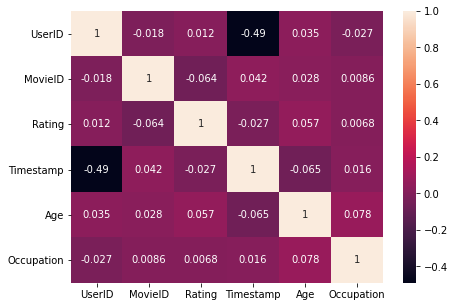

In [ ]:
#features = masterdata[['Rating', 'Gender', 'Age','Occupation','Genres']]
fig, ax = plt.subplots(figsize=(7,5))
#sns.heatmap(features.corr(), annot=True, ax=ax)
sns.heatmap(masterdata.corr(), annot=True)

In [ ]:
X = masterdata[['Gender', 'Age','Occupation', 'Title', 'Genres']].copy()
#X = masterdata.drop(['Timestamp', 'Zip-code','UserID', 'MovieID','Rating'], axis=1, inplace=True)
y = masterdata['Rating'].copy()

In [ ]:
import re
def age(text):
    regex = r'\(([0-9]+)\)'
    b = re.findall(regex,text)
    return 2021 - int(b[0])

X['MovieAge'] = X['Title'].apply(age)

In [ ]:
for x in unique_genres:
    X[x] = X['Genres'].str.contains(x)*1
    
X.head()

,Gender,Age,Occupation,Title,Genres,MovieAge,Film-Noir,Crime,Sci-Fi,Mystery,Fantasy,Western,Romance,Thriller,Adventure,Animation,Horror,Drama,Comedy,Action,Documentary,Musical,War,Children's
0,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama,46,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,F,1,10,James and the Giant Peach (1996),Animation|Children's|Musical,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,F,1,10,My Fair Lady (1964),Musical|Romance,57,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,F,1,10,Erin Brockovich (2000),Drama,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,F,1,10,"Bug's Life, A (1998)",Animation|Children's|Comedy,23,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


- We need to label encode Gender.
- Occupation is currently manually label encoded but it needs to be one hot encoded.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X = pd.get_dummies(X, columns=['Age', 'Occupation'], drop_first=True)
X.drop(['Title', 'Genres'], axis=1, inplace=True)
X.head()

,Gender,MovieAge,Film-Noir,Crime,Sci-Fi,Mystery,Fantasy,Western,Romance,Thriller,Adventure,Animation,Horror,Drama,Comedy,Action,Documentary,Musical,War,Children's,Age_18,Age_25,Age_35,Age_45,Age_50,Age_56,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,0,46,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,57,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,23,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_col = list(X.columns)

In [ ]:
len(X_col)

46

In [ ]:
X = X.iloc[:,:].values
y = y.iloc[:].values

## Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#sc = ColumnTransformer([('scaler', StandardScaler(),[1])], remainder='passthrough')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

Confusion Matrix plot:


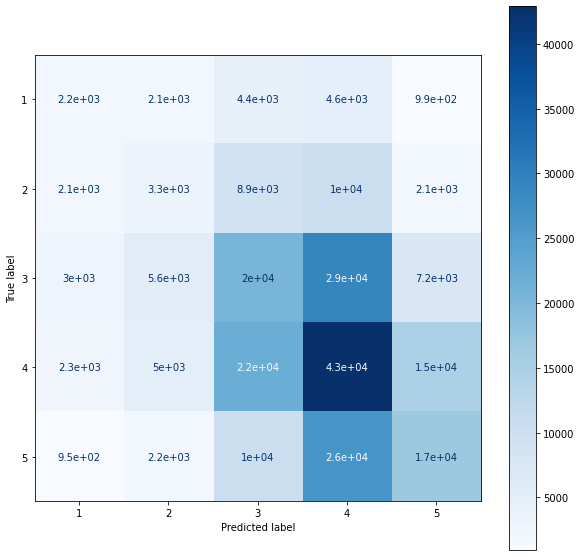

Confusion Matrix :
[[ 2203  2054  4360  4607   992]
 [ 2120  3273  8918 10269  2115]
 [ 2991  5552 20492 29090  7208]
 [ 2277  4973 22053 42907 14845]
 [  947  2182 10448 26429 16748]]


              precision    recall  f1-score   support

           1       0.21      0.15      0.18     14216
           2       0.18      0.12      0.15     26695
           3       0.31      0.31      0.31     65333
           4       0.38      0.49      0.43     87055
           5       0.40      0.30      0.34     56754

    accuracy                           0.34    250053
   macro avg       0.30      0.28      0.28    250053
weighted avg       0.33      0.34      0.33    250053



In [ ]:
#Check model performance using confusion matrix and classification report.
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print("Confusion Matrix plot:")
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

### Feature Importance

In [ ]:
feat_imp = pd.DataFrame(classifier.tree_.compute_feature_importances(normalize=False))
feat = pd.DataFrame(X_col)
feature_imp = pd.concat([feat, feat_imp], axis=1)
feature_imp.columns = ['Feature', 'Importance']
feature_imp.sort_values(by=['Importance'], ascending=False, inplace=True)
feature_imp.set_index('Feature', inplace=True)
feature_imp

,Importance
Feature,
MovieAge,0.088772
Gender,0.045989
Age_25,0.027875
Age_35,0.025968
Age_18,0.020527
Occupation_1,0.020087
Age_45,0.019627
Occupation_7,0.019467
Age_50,0.018311


#### Visualise the feature importance

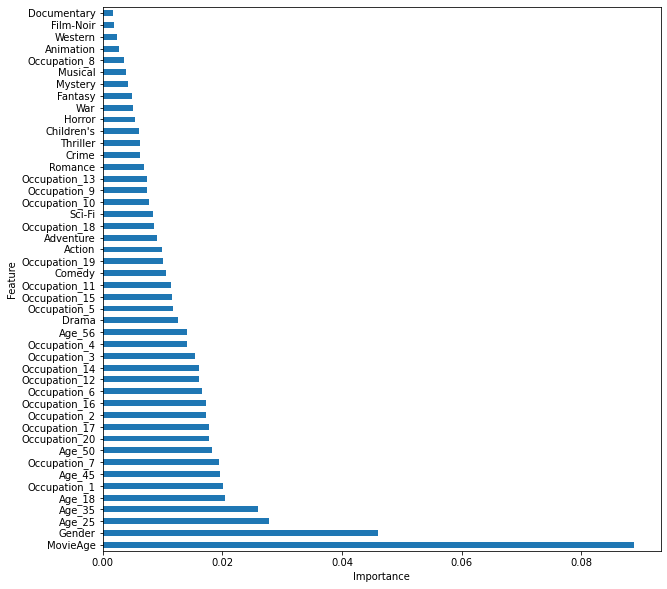

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
feature_imp.Importance.plot(kind='barh', ax=ax)
plt.xlabel('Importance')
plt.show()

Top 2 features:
- Gender
- Movie age

## Logistic regression - One vs. All

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='ovr', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

Confusion Matrix plot:


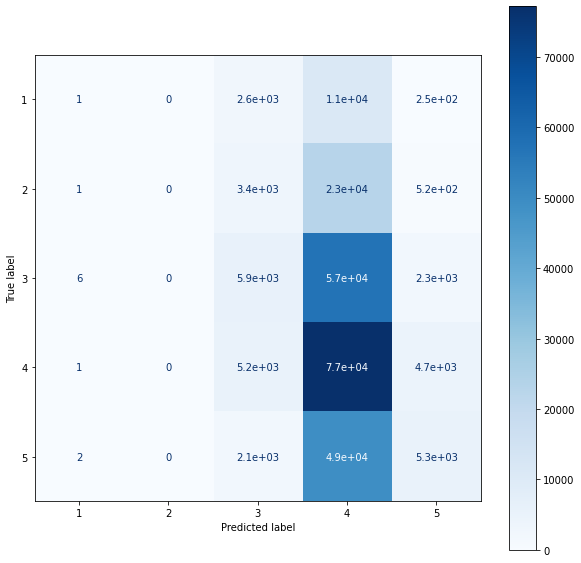

Confusion Matrix :
[[    1     0  2637 11330   248]
 [    1     0  3370 22809   515]
 [    6     0  5854 57190  2283]
 [    1     0  5164 77217  4673]
 [    2     0  2137 49362  5253]]




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.09      0.00      0.00     14216
           2       0.00      0.00      0.00     26695
           3       0.31      0.09      0.14     65333
           4       0.35      0.89      0.51     87055
           5       0.40      0.09      0.15     56754

    accuracy                           0.35    250053
   macro avg       0.23      0.21      0.16    250053
weighted avg       0.30      0.35      0.25    250053



In [ ]:
#Check model performance using confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix plot:")
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

## Naive Bayes Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = ColumnTransformer([('scaler', StandardScaler(),[1])], remainder='passthrough')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

Confusion Matrix plot:


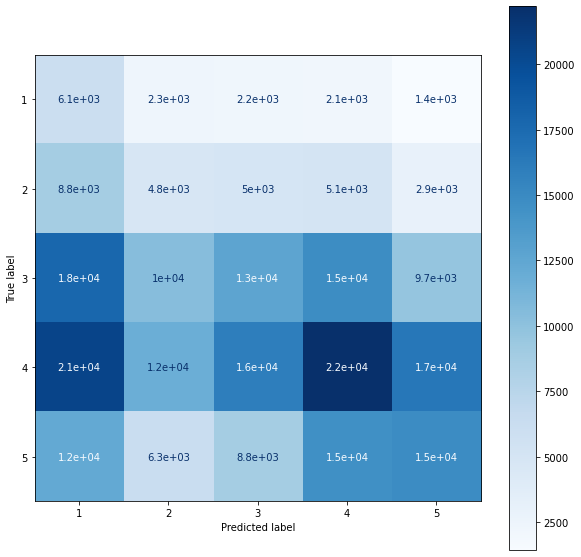

Confusion Matrix :
[[ 6098  2342  2216  2124  1436]
 [ 8806  4829  4995  5149  2916]
 [17764 10392 12695 14815  9667]
 [20572 11799 15933 22221 16530]
 [12273  6280  8791 14534 14876]]


              precision    recall  f1-score   support

           1       0.09      0.43      0.15     14216
           2       0.14      0.18      0.15     26695
           3       0.28      0.19      0.23     65333
           4       0.38      0.26      0.30     87055
           5       0.33      0.26      0.29     56754

    accuracy                           0.24    250053
   macro avg       0.24      0.26      0.23    250053
weighted avg       0.30      0.24      0.26    250053



In [ ]:
#Check model performance using confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix plot:")
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

## KNN Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = ColumnTransformer([('scaler', StandardScaler(),[1])], remainder='passthrough')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

Confusion Matrix plot:


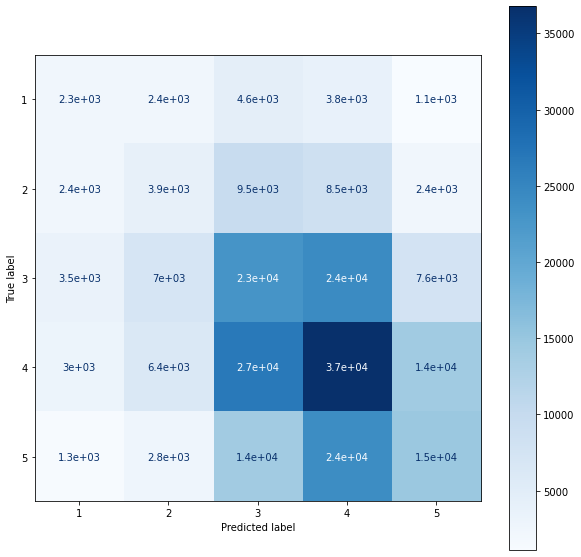

Confusion Matrix :
[[ 2345  2375  4567  3805  1124]
 [ 2359  3925  9520  8521  2370]
 [ 3481  6981 22914 24321  7636]
 [ 3012  6408 26653 36785 14197]
 [ 1328  2759 13970 23997 14700]]


              precision    recall  f1-score   support

           1       0.19      0.16      0.18     14216
           2       0.17      0.15      0.16     26695
           3       0.30      0.35      0.32     65333
           4       0.38      0.42      0.40     87055
           5       0.37      0.26      0.30     56754

    accuracy                           0.32    250053
   macro avg       0.28      0.27      0.27    250053
weighted avg       0.32      0.32      0.32    250053



In [ ]:
#Check model performance using confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix plot:")
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print('\n')
print(classification_report(y_test, y_pred))

- Decision tree accuracy      : 34% 
- Logistic regression accuracy: 35%
- Naive Bayes accuracy        : 24%
- KNN accuracy                : 32%

## Thus, we see that Logistic regression gives us the best performance